# Optional Lab: Model Representation

<figure>
 <img src="./images/C1_W1_L3_S1_Lecture_b.png"   style="width:600px;height:200px;">
</figure>

## Goals
In this lab you will:
- Learn to implement the model $f_{w,b}$ for linear regression with one variable

## Notation
Here is a summary of some of the notation you will encounter.  

| General Notation     | Python (if applicable) | Description                                                                                             |
| :--                  | :--                    | :--                                                                                                     |
| $a$                  |                        | scalar, non bold                                                                                        |
| $\mathbf{a}$         |                        | vector, bold                                                                                            |
| **Regression**       |                        |                                                                                                         |  |
| $\mathbf{x}$         | `x_train`              | Training Example feature values (in this lab - Size (1000 sqft))                                        |
| $\mathbf{y}$         | `y_train`              | Training Example  targets (in this lab Price (1000s of dollars))                                        |
| $x^{(i)}$, $y^{(i)}$ | `x_i`, `y_i`           | $i_{th}$ Training Example                                                                               |
| m                    | `m`                    | Number of training examples                                                                             |
| $w$                  | `w`                    | parameter: weight                                                                                       |
| $b$                  | `b`                    | parameter: bias                                                                                         |
| $f_{w,b}(x^{(i)})$   | `f_wb`                 | The result of the model evaluation at $x^{(i)}$ <br> parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$ |



## Tools
In this lab you will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [2]:
import numpy as np                      # https://numpy.org/ package for mathematical calculations
import matplotlib.pyplot as plt         # https://matplotlib.org package for 2D graphs
plt.style.use('./deeplearning.mplstyle') # matplotlib style sheet

# Problem Statement

<img src="./images/C1_W1_L3_S1_trainingdata.png" /> 

As in the lecture, you will use the motivating example of housing price prediction.  
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for $300,000 and a house with 2000 square feet sold for $500,000. These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.


Please run the following code cell to create your `x_train` and `y_train` variables. The data is stored in one-dimensional NumPy arrays.

In [3]:
x_train = np.array([1.0, 2.0])      # x_train is the input variable (size in 1000 square feet)
y_train = np.array([300.0, 500.0])  # y_train is the target (price in 1000s of dollars)
print(f"x_train = {x_train}"); 
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


>**Note**: The course will frequently utilize the python 'f-string' output formatting described [here](https://docs.python.org/3/tutorial/inputoutput.html) when printing. The content between the curly braces is evaluated when producing the output.

### Number of training examples `m`
You will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.

In [40]:
print(f"x_train.shape: {x_train.shape}") # `.shape` returns a tuple with the number of rows and columns
m = x_train.shape[0]        # `.shape[0]` returns the number of rows ie number of training examples
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


One can also use the Python `len()` function as shown below.

In [115]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(f"len:      {len(arr)}")
print(f"shape:    {arr.shape}")
print(f"shape[0]: {arr.shape[0]}")

Number of training examples is: 2
len:      2
shape:    (2, 3)
shape[0]: 2


### Training example `x_i, y_i`

You will use ($x^{(i)}$, $y^{(i)}$) to denote the $i^{th}$ training example. 

Since Python is zero indexed, 
- $(x^{(0)}$, $y^{(0)}) = (1.0, 300.0)$ 
- $(x^{(1)}$, $y^{(1)}) = (2.0, 500.0)$

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [116]:
i = 0 # Change this to 1 to see (x^1, y^1)

for i in range(len(x_train)):
    x_i = x_train[i]
    y_i = y_train[i]
    print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)
(x^(1), y^(1)) = (2.0, 500.0)


### Plotting the data

You can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

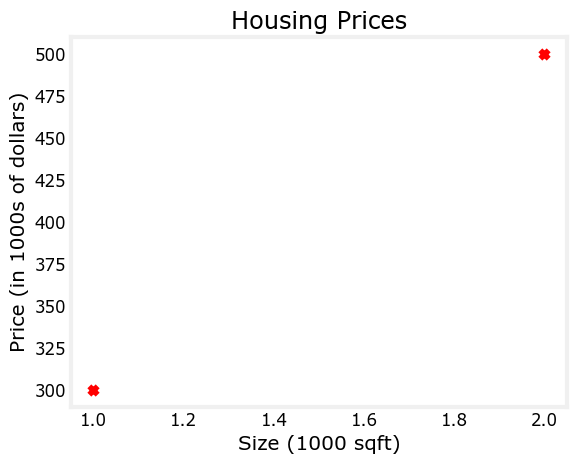

In [123]:
plt.scatter(x_train, y_train, marker='x', c='red')  # Plot the data points
plt.title("Housing Prices")                         # Set the title
plt.ylabel('Price (in 1000s of dollars)')           # Set the y-axis label
plt.xlabel('Size (1000 sqft)')                      # Set the x-axis label
plt.show()

## Model function

<img src="./images/C1_W1_L3_S1_model.png" />
As described in lecture, the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot.

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$. 

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [124]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zeros(n)` will return a one-dimensional numpy array with $n$ entries   


In [135]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m) # return 1-dim array of zeros
    for i in range(m):
        f_wb[i] = w * x[i] + b # compute the model output
    return f_wb

Now let's call the `compute_model_output` function and plot the output..

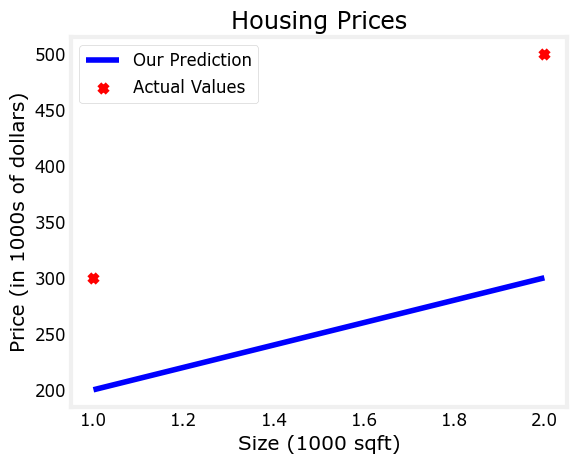

In [155]:
w=100; b=100; tmp_f_wb = compute_model_output(x_train, w, b)

plt.plot(x_train, tmp_f_wb, c='blue', label='Our Prediction')        # Plot our model prediction
plt.scatter(x_train, y_train, marker='x', c='red', label='Actual Values') # Plot the data points
plt.title("Housing Prices")                 # Set the title
plt.ylabel('Price (in 1000s of dollars)')   # Set the y-axis label
plt.xlabel('Size (1000 sqft)')              # Set the x-axis label
plt.legend()                                # Add the legend                
plt.show()                                  # Show the plot

As you can see, setting $w = 100$ and $b = 100$ does **not result in a line that fits** our data. 

Challenge: Try experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data?

Tip: You can use your mouse to click on the green "Hints" below to reveal some hints for choosing b and w.

<details>
<summary>
    <font size='3', color='darkgreen'><b>Hints</b></font>
</summary>
    <p>
    <ul>
        <li>Try $w = 200$ and $b = 100$ </li>
    </ul>
    </p>

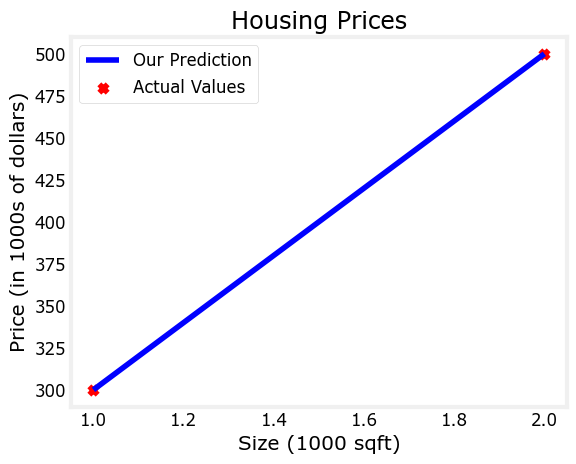

In [174]:
w = 200; b = 100; tmp_f_wb = compute_model_output(x_train, w, b)
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction') # Plot our model prediction
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values') # Plot the data points
plt.title("Housing Prices") # Set the title
plt.ylabel('Price (in 1000s of dollars)') # Set the y-axis label
plt.xlabel('Size (1000 sqft)') # Set the x-axis label
plt.legend(); plt.show()

### Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.


In [175]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


# Congratulations!
In this lab you have learned:
 - Linear regression builds a model which establishes a relationship between features and targets
     - In the example above, the feature was house size and the target was house price
     - for simple linear regression, the model has two parameters $w$ and $b$ whose values are 'fit' using *training data*.
     - once a model's parameters have been determined, the model can be used to make predictions on novel data.